### Deep Learning: Training Artificial Neural Networks for Image Recognition



Here we will train a simple neural network using  forward propagation process to classify the handwritten digits from the MNIST
dataset. The we will use Keras to make these tasks even easier! 


Our neural network will have the following qualities to it:

 - An input layer
 - 2 hidden layers, one with 5 neurons, and one with 10 neurons
 - an output layer that has 10 predicted classes of outcomes.
 
Data:

We use the popular MNIST dataset. The training dataset consists of 60,000 training digits. The test set contains 10,000 samples. The images in the MNIST dataset consist of 28×28pixels, and each pixel is represented by a gray scale intensity value.
The target variable are the class labels (integers 0-9) of the handwritten digits.

The MNIST dataset can be easily downloaded from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

####  Imports

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data

In [20]:
from keras.datasets import mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()

#### Check the shape of training images:

In [21]:
train_img.shape

(60000, 28, 28)

In [22]:
#look at the first item
train_img[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

####  Visualization: use matplotlib's imshow() to see what an image looks like

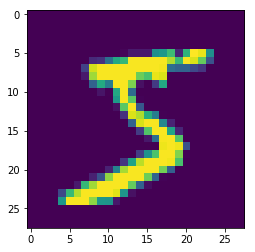

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_img[0])

### Part 1: Introducing the Multi-layer Forward Propagation process for Neural Networks:

For simplicity we work with first 100 images:

In [24]:
# create a new variables
X, y = train_img[:100], train_label[:100]

#### Standardize the data

by dividing the training set by 255

In [46]:
X = X/255

In [26]:
X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Reshape data to 2D format: 100 x 784

In [27]:
X = X.reshape(100, 784)

####  Initialize a hidden unit with n_hidden=10 neurons:

In [28]:
hidden_unit = np.random.normal(0, 0.1, 7840).reshape(784, 10)

#### Use the dot() method to matrix multiply your input and hidden layer.  

In [29]:
hidden_output = X.dot(hidden_unit)

#### Apply ReLu Activation Function

Activation functions in hidden units are meant to be 'gentle', and reduce non-linearity slowly.

ReLu max(0,x) is the most commonly used activation function for hidden layers



In [30]:
hidden_output = np.maximum(0, hidden_output)
hidden_output[:10]

array([[1.05840139, 0.        , 0.88610143, 1.07999698, 0.        ,
        1.18075211, 0.1930986 , 0.64839176, 1.22406938, 0.        ],
       [0.82181344, 0.        , 2.60829939, 0.26623728, 0.07509817,
        1.29507313, 0.        , 1.28918913, 0.27494108, 0.64814701],
       [0.62114997, 0.2671634 , 0.        , 0.        , 0.        ,
        1.49376726, 0.        , 0.12888176, 0.        , 0.40337047],
       [0.        , 0.        , 1.06935519, 0.        , 0.        ,
        0.        , 0.29674299, 0.47204197, 0.41618642, 0.        ],
       [0.        , 0.        , 0.24959483, 0.        , 0.        ,
        0.05231118, 0.        , 1.18964619, 1.47903504, 0.0733401 ],
       [0.        , 0.        , 1.37187456, 0.0304338 , 0.        ,
        0.2409147 , 0.85082786, 1.1897305 , 1.34630737, 0.07338942],
       [0.26013869, 0.        , 0.        , 0.64887657, 0.        ,
        0.        , 0.        , 0.        , 0.79158393, 0.        ],
       [1.39928597, 0.        , 0.4057412

The shape of your output should be 100 x 10.

####  Initialize another hidden layer with n_hidden=5 neurons.

In [32]:
second_hidden_unit = np.random.normal(0, 0.1, 50).reshape(10, 5)
second_output = hidden_output.dot(second_hidden_unit)

In [33]:
second_output = np.maximum(0, second_output)

#### Create the output layer with 10 predicted answers:

In [35]:
output_layer = np.random.normal(0, 0.1, 50).reshape(5, 10)

#### Use matrix multiplication .dot to multiply the last hidden layer with output layer:

In [36]:
final_output = second_output.dot(output_layer)

In [37]:
final_output.shape

(100, 10)

In [38]:
final_output[0]

array([-0.03470666, -0.02386044, -0.01177928,  0.03514857, -0.00862515,
       -0.09522808, -0.03356933,  0.00834793, -0.04593817, -0.08430996])

#### Now we provide our final activation function

Output activation functions are much stronger. 

We will use Sigmoid function to make the final prediction

expit is another name for the sigmoid function


In [39]:
from scipy.special import expit

In [40]:
final_preds = expit(final_output)

In [41]:
final_preds[:3]

array([[0.4913242 , 0.49403517, 0.49705521, 0.50878624, 0.49784373,
        0.47621095, 0.49160845, 0.50208697, 0.48851748, 0.47893499],
       [0.49912405, 0.50330332, 0.49766296, 0.51817138, 0.4920288 ,
        0.47676577, 0.48826009, 0.50301859, 0.47963077, 0.47352878],
       [0.49833769, 0.49372652, 0.50100607, 0.49778735, 0.49767441,
        0.48574082, 0.48730665, 0.51074789, 0.49181667, 0.48643311]])

####  Create prediction by choosing the column in the output layer with the highest overall value.


In [42]:
# To get our final predictions use np.argmax()

final_predictions = np.argmax(final_preds, axis=1)

In [44]:
final_predictions[:10]

array([3, 3, 7, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [45]:
final_predictions

array([3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 8, 3, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 7, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7,
       3, 7, 3, 3, 3, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 3, 7, 3,
       3, 3, 7, 7, 3, 3, 3, 3, 3, 3, 7, 3], dtype=int64)

#### Summarizing the forward propagation process:

- Forward propagation is the basic machinery of how a neural network makes its predictions

- The units in the hidden layer are fully connected to the input layer, and the output layer is fully connected to the hidden layer, respectively.

- A network with more than one hidden layer is called deep artificial neural network

- We can think of the number of layers and units in a neural network as additional hyperparameters that we want to optimize for a given problem task using the cross-validation

- the presence of hidden layers + non-linear activation functions allows a neural network to go beyond linear models and identify hidden patterns in raw data

- starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output

- In training a neural network to fit a model, we go through many round (typically 10-50) of this forward propagation process until it converges on the appropriate weights for each variable 




### Part 2: Training a Neural Network using Keras



In [47]:
# standardize your data
train_img = train_img / 255.0

test_img = test_img / 255.0

#### Keras makes these task very easy:   

The code below is the equivalent of what we just created in the previously to implement a feedforward neural network:

- We added 2 hidden layers with 10 and 5 neurons using activation function ReLu

- We used sigmoid as activation function for the output layer with 10 predicted answers:

- Make sure that the first layer that we add is the input layer -the input_dim attribute has to match the number of features (columns) in the training set (28,28)



In [50]:
#Initialize a new model using the Sequential class:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

In [56]:
#Compile:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- We set the loss (cost) function to categorical_crossentropy and performance metrics to accuracy.

In [57]:
# Define an optimizer to update your weights: 
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)


 - We chose a stochastic gradient descent (SGD) optimization

 - We set values for the weight decay constant and momentum learning to adjust the learning rate at each epoch

In [58]:
# Train a neural network model by calling the fit method - epochs is the rounds of forward propagation
model.fit(train_img, train_label, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 1.8053 - accuracy: 0.3124
Epoch 2/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.6961 - accuracy: 0.7989
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5118 - accuracy: 0.8559
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4614 - accuracy: 0.8710
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4314 - accuracy: 0.8810
Epoch 6/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4093 - accuracy: 0.8870
Epoch 7/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3912 - accuracy: 0.8921
Epoch 8/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.3764 - accuracy: 0.8970
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3623 - accuracy: 0.9005
Epoch 10/10
60

In [59]:
#Evaluate model performance
test_loss, test_acc = model.evaluate(test_img, test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### Predict the class labels

we use the predict_classes method to return the class labels directly as integers:

In [60]:
y_train_pred = model.predict_classes(train_img, verbose=0)

In [61]:
print('First 3 predictions: ', y_train_pred[:3])

First 3 predictions:  [3 0 4]


### Summary: Training a simple neural network using Keras without optimized tuning parameters. 


Playing more with Keras. Most common parameter to play around with: 

- the learning rate "eta" -typical values will be anywhere from 0.0001 to 0.3
- momentum, weight decay, and number of hidden units.